# S07 T01 Datos, probabilidades y estadísticas

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [132]:
df = pd.read_csv("results.csv")
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42423,2021-07-06,Trinidad and Tobago,French Guiana,1,1,Gold Cup qualification,Fort Lauderdale,United States,True
42424,2021-07-07,England,Denmark,2,1,UEFA Euro,London,England,False
42425,2021-07-09,Peru,Colombia,2,3,Copa América,Brasília,Brazil,True
42426,2021-07-10,Brazil,Argentina,0,1,Copa América,Rio de Janeiro,Brazil,False


In [133]:
# hay valores nulos?
df['home_score'].isna().sum()

0

<AxesSubplot:ylabel='home_score'>

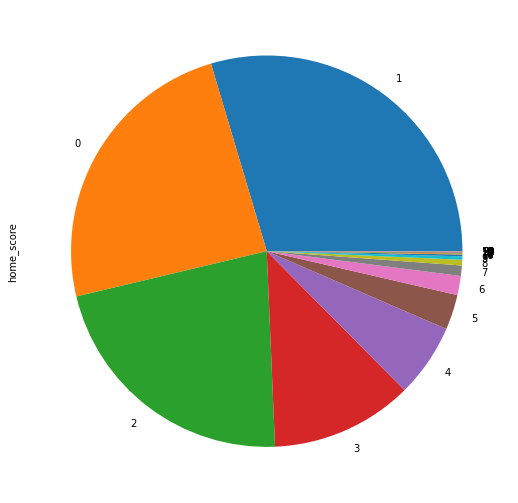

In [148]:
    counts = df.home_score.value_counts()
    # use a pie plot
    counts.plot(kind='pie', y=df.home_score, figsize =(9, 9))

Se ve que la mayoría de los valores que toma son 0 o 1

## Exercici 1
Calcular la moda, la media, la desviación estándar y la mediana aritmética de alguno de los atributos, en este caso: home:score 

### Cálculo de la media (el valor promedio)

In [135]:
m = pd.DataFrame.mean(df['home_score'])
round(m,2)

1.74

### Cálculo de la mediana (el valor que está en el medio de los datos, o el promedio de dos si los datos son pares)

In [149]:
mn = pd.DataFrame.median(df['home_score'])
round(mn,2)

1.0

### Cálculo de la moda (el valor que más se repite)

In [146]:
md = df['home_score'].mode()[0]
md

1

### Cálculo de la desviación estándar

In [147]:
sd = pd.DataFrame.std(df['home_score'])
round(sd,2)

1.75

## Exercici 2
Calcular la correlación entre home_score y away_score

In [138]:
corr = df[['home_score','away_score']].corr()
round(corr.iloc[1,0],2)

-0.14

In [139]:
# eso significa que las variables no están relacionadas. Tiene sentido, porque los 
# goles en un partido no dependen de los que haga el otro equipo

## Exercici 3
Matriz de correlación (todas las variables del df) graficada

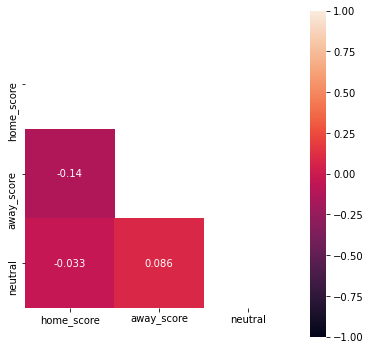

In [140]:
correlac = df.corr()
mascara = np.triu(correlac)
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(correlac, vmax=1, vmin=-1, square=True, mask=mascara, annot = True);
plt.show()

No hay correlación con la varible neutral tampoco

## Exercici 4
Calcular la media geométrica y la media armónica
### Media geométrica


In [150]:
from scipy import stats

col_home_score = df.iloc[:,3:4]
col_home_score

,home_score
0,0
1,4
2,2
3,2
4,3
...,...
42423,1
42424,2
42425,2
42426,0


In [151]:
import warnings
warnings.filterwarnings("ignore")
# daba un warning de división por cero

print(stats.gmean(col_home_score,axis=0))


[0.]


In [152]:
# veo si realmente el resultado que obtuve es correcto
multiply = 1
values = (col_home_score)
n = len(values)


for i in df.home_score:
    multiply = (multiply)*(i)

geometricMean = (multiply)**(1/n)
print ('The Geometric Mean is: ' + str(geometricMean)) 


The Geometric Mean is: 0.0


### Media armónica

In [153]:
import statistics
print('The Harmonic Mean is: ', statistics.harmonic_mean(df.home_score))

The Harmonic Mean is:  0
